# 音声をリアルタイム取得しながら、リアルタイム音声生成する

<IPython.core.display.Javascript object>


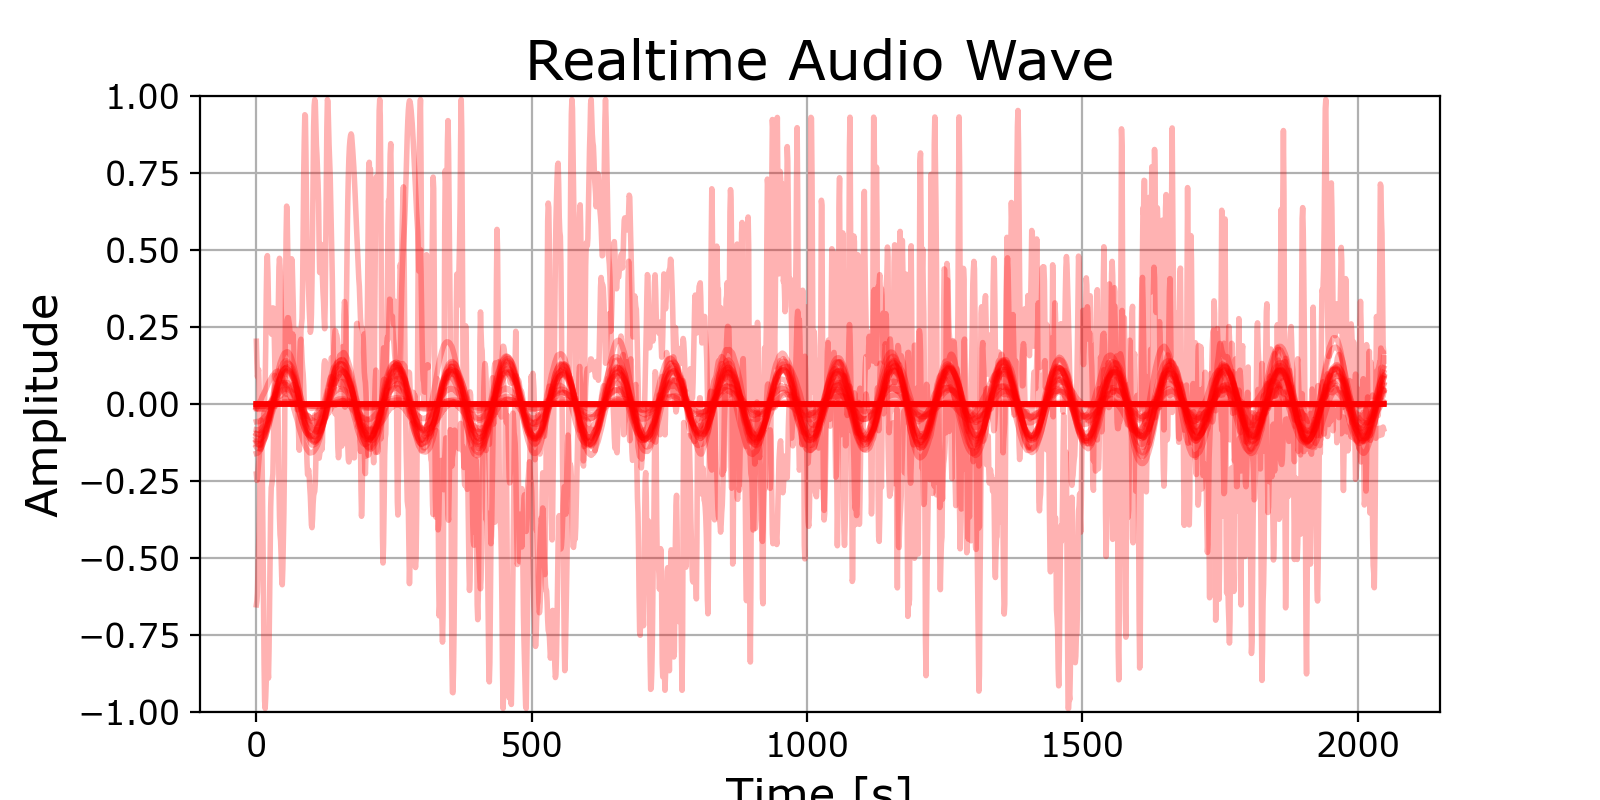

In [1]:
from avfaudio.audio_capturing_and_rendering_rubicon import AVAudio_Capture_and_Rendering
import time
import math
import numpy as np

# チャートのリアルタイム更新用
%matplotlib notebook
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111)
plt.tick_params(labelsize=12)
plt.title("Realtime Audio Wave", fontsize=20)
plt.xlabel("Time [s]", fontsize=16)
plt.ylabel("Amplitude", fontsize=16)
plt.ylim([-1,1])
ax.grid()

# 音声取得がされるたびに呼び出される関数を定義しておく（音声波形を描く）
def plot_audio_wave(np_audio_array):
    ax.plot(np_audio_array,linewidth=2, color="#ff0000", alpha=0.3)
    fig.canvas.draw()

# 音声波形を生成するための関数を定義しておく（channel=0:右、1:左）
def rendering_function(t, channel):
    if channel == 0:
        return 1.0 * math.sin(440.0 * 2.0 * math.pi * t)
    if channel == 1:
        return 1.0 * math.sin(220.0 * 2.0 * math.pi * t)

# 音声収録必要なクラスを読み込む
AVAudio_Capture_and_Rendering_ = AVAudio_Capture_and_Rendering(
    2048,               # 刻々取得する音声データ用のバッファーサイズ
    plot_audio_wave,    # 取得した音声データを描く
    rendering_function, # 音声波形を生成する
    2                   # ステレオなら2、モノラルなら1(2以外)
)

# 音声キャプチャと音声出力を始める
AVAudio_Capture_and_Rendering_.start()

# 一定時間、動作させる
time.sleep(3)

# 処理終了
AVAudio_Capture_and_Rendering_.stop()